In [2]:
import math
import astropy
from astropy import units as u
from astropy.coordinates import SkyCoord
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import ligo.skymap.plot

In [3]:
def get_ISO_mass(df):
    "Given a dataframe of GAIA stars, output mass of ISOs produced by those stars"
    mass_solar_ISOs = 30 #M_earth
    k = np.power(10, df['mh_gspphot'])
    ISO_properties_sum = np.sum(np.multiply(k, df['mass_flame'])) #mass is in solar masses
    return ISO_properties_sum * mass_solar_ISOs

In [4]:
def main_seq_line(color):
    mag = 3*color + 9.6
    mag = np.clip(mag, -3,19)
    return mag

def get_MS(df):
    colors = df["phot_bp_mean_mag"] - df["phot_rp_mean_mag"]
    mag = df["phot_g_mean_mag"]
    indices_above_msline = np.greater(main_seq_line(colors),mag)
    indices_in_turnoff_range = np.greater(colors,1)
    indices_turnoff_stars = np.less(mag[np.greater(colors,1)],7.5)
    return df[indices_above_msline]

In [5]:
def hr_scatter(ax,df,color = "gray", s = .01, alpha = 1, label = "Data"):
    ax.set_xlabel("Color (r-b)",fontsize = 15)
    ax.set_ylabel("Magnitude (g)",fontsize = 15)
    ax.scatter(df["phot_bp_mean_mag"] - df["phot_rp_mean_mag"], \
        df["phot_g_mean_mag"], color = color, label=label, s=s, alpha=alpha)
    
def color_hist(ax,df, num_bins = 200, color = "gray", alpha = 1, label = "Data"):
    ax.set_xlabel("Color (r-b)",fontsize = 15)
    ax.set_ylabel("N",fontsize = 15)
    ax.hist(df["phot_bp_mean_mag"] - df["phot_rp_mean_mag"], bins = num_bins, color=color,label=label, alpha=alpha)

In [6]:
def hr_hist(majority,minority,majority_label = "Majority", minority_label = "Minority", title = "", num_bins_minority=50):
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
    axs[0].set_title(title,fontsize=18)
    
    axs[0].invert_yaxis()
    hr_scatter(axs[0], majority,label = majority_label)
    hr_scatter(axs[0], minority, color="teal", s=.1,label = minority_label)
    lgnd = axs[0].legend(fontsize = 12)
    for handle in lgnd.legendHandles:
        handle.set_sizes([50])
        handle.set_alpha(1)

    
    color_hist(axs[1],majority, label = majority_label)
    color_hist(axs[1],minority, color="teal",num_bins=num_bins_minority, label = minority_label)
    axs[1].legend(fontsize = 12)
    plt.show()

In [8]:
data = pd.read_csv("../files/gcns_with_mass.csv")
data.columns

Index(['Unnamed: 0', 'RA', 'RA_ERROR', 'DEC', 'DEC_ERROR', 'PARALLAX',
       'PARALLAX_ERROR', 'PMRA', 'PMRA_ERROR', 'PMDEC', 'PMDEC_ERROR',
       'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag',
       'has_mcmc_gspphot', 'mh_gspphot', 'mh_gspphot_lower',
       'mh_gspphot_upper', 'distance_gspphot', 'distance_gspphot_lower',
       'distance_gspphot_upper', 'teff_gspphot', 'teff_gspphot_lower',
       'teff_gspphot_upper', 'logg_gspphot', 'logg_gspphot_lower',
       'logg_gspphot_upper', 'ipd_frac_multi_peak', 'MASS_FLAME',
       'mass_flame'],
      dtype='object')

In [9]:
with_metal = data[data['has_mcmc_gspphot']]
without_metal = data[np.logical_not(data['has_mcmc_gspphot'])]
with_mass = data[np.logical_not(np.isnan(data['mass_flame']))]
without_mass = data[np.isnan(data['mass_flame'])]
without_mass_or_metal = data[np.logical_and(np.logical_not(data['has_mcmc_gspphot']),np.isnan(data['mass_flame']))]
with_mass_and_metal = data[np.logical_and(data['has_mcmc_gspphot'],np.logical_not(np.isnan(data['mass_flame'])))]
missing_something = data[np.logical_or(np.logical_not(data['has_mcmc_gspphot']),np.isnan(data['mass_flame']))]

metal_only = data[np.logical_and(data['has_mcmc_gspphot'],np.isnan(data['mass_flame']))]
mass_only = data[np.logical_and(np.logical_not(np.isnan(data['mass_flame'])),np.logical_not(data['has_mcmc_gspphot']))]
both = data[np.logical_and(np.logical_not(np.isnan(data['mass_flame'])),data['has_mcmc_gspphot'])]
neither = data[np.logical_and(np.isnan(data['mass_flame']),np.logical_not(data['has_mcmc_gspphot']))]

In [10]:
both['mh_gspphot']

5         0.0906
15       -0.1882
43       -0.0532
45        0.0707
73       -0.5542
           ...  
331199    0.5508
331221    0.0000
331242    0.3481
331279    0.2627
331284   -0.4877
Name: mh_gspphot, Length: 18408, dtype: float64

In [11]:
print(mass_only.shape)
print(metal_only.shape)
print(both.shape)
print(neither.shape)

(29101, 30)
(100390, 30)
(18408, 30)
(184101, 30)


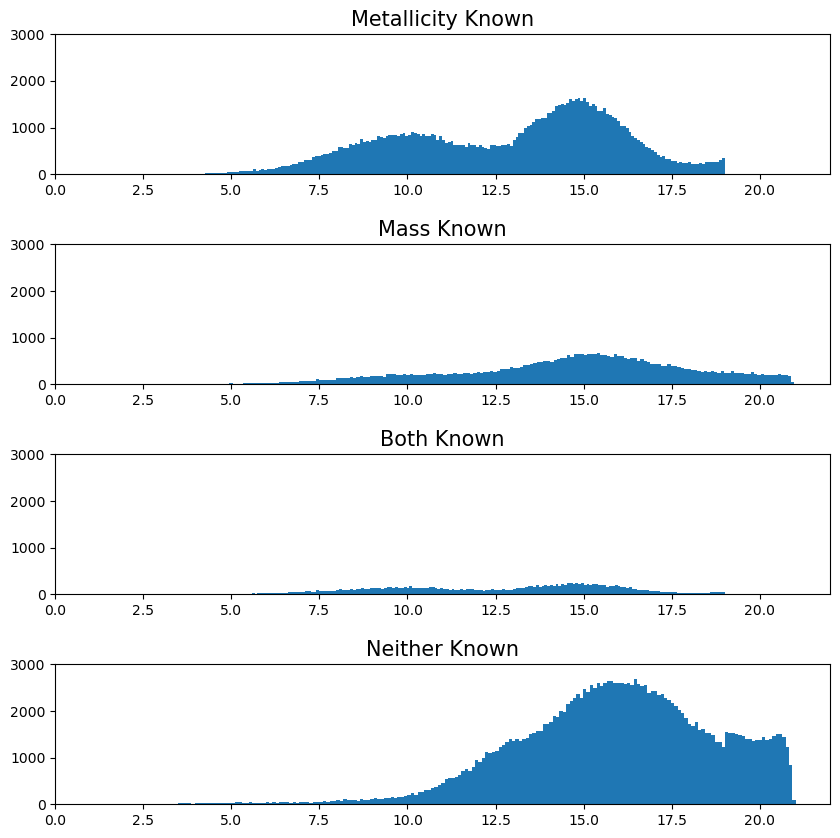

In [12]:
num_bins = 200
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 10))

axs[0].hist(with_metal['phot_g_mean_mag'], bins = num_bins)
axs[0].set_title("Metallicity Known",fontsize = 15)
#axs[0].set_ylim([0,3000])

axs[1].hist(with_mass['phot_g_mean_mag'], bins = num_bins)
axs[1].set_title("Mass Known",fontsize = 15)
#axs[1].set_ylim([0,3000])

axs[2].hist(both['phot_g_mean_mag'], bins = num_bins)
axs[2].set_title("Both Known",fontsize = 15)
#axs[2].set_ylim([0,3000])

axs[3].hist(neither['phot_g_mean_mag'], bins = num_bins)
axs[3].set_title("Neither Known",fontsize = 15)

max_y = 3000
axs[0].set_ylim([0,max_y])
axs[1].set_ylim([0,max_y])
axs[2].set_ylim([0,max_y])
axs[3].set_ylim([0,max_y])

max_x = 22
axs[0].set_xlim([0,max_x])
axs[1].set_xlim([0,max_x])
axs[2].set_xlim([0,max_x])
axs[3].set_xlim([0,max_x])

fig.subplots_adjust(hspace=.5)

/var/folders/_1/kjfmx9l970x8msh8rfwt4fzr0000gn/T/ipykernel_5699/838911091.py:9: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgnd.legendHandles:


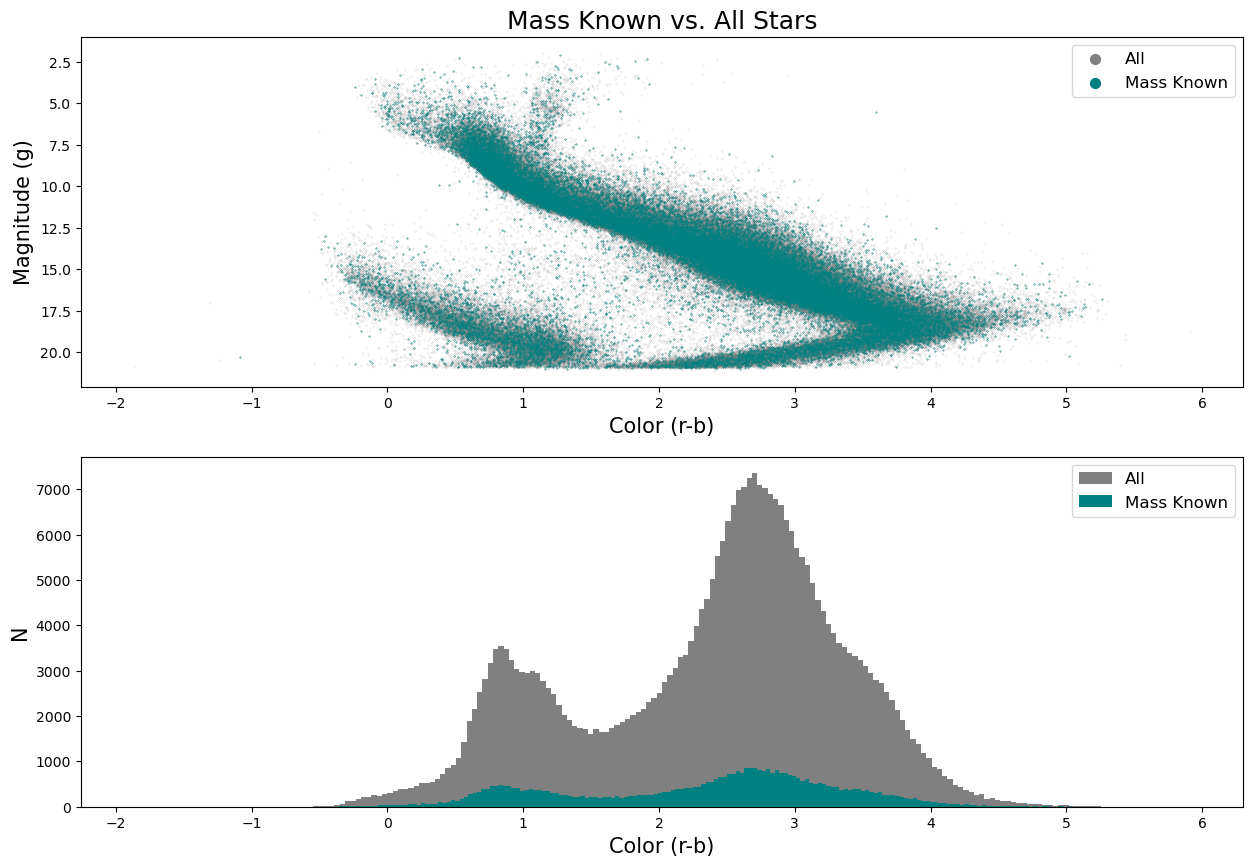

In [13]:
hr_hist(data,pd.concat([mass_only,both]),majority_label = "All", minority_label = "Mass Known",\
        num_bins_minority = 200, title="Mass Known vs. All Stars")

/var/folders/_1/kjfmx9l970x8msh8rfwt4fzr0000gn/T/ipykernel_5699/838911091.py:9: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgnd.legendHandles:


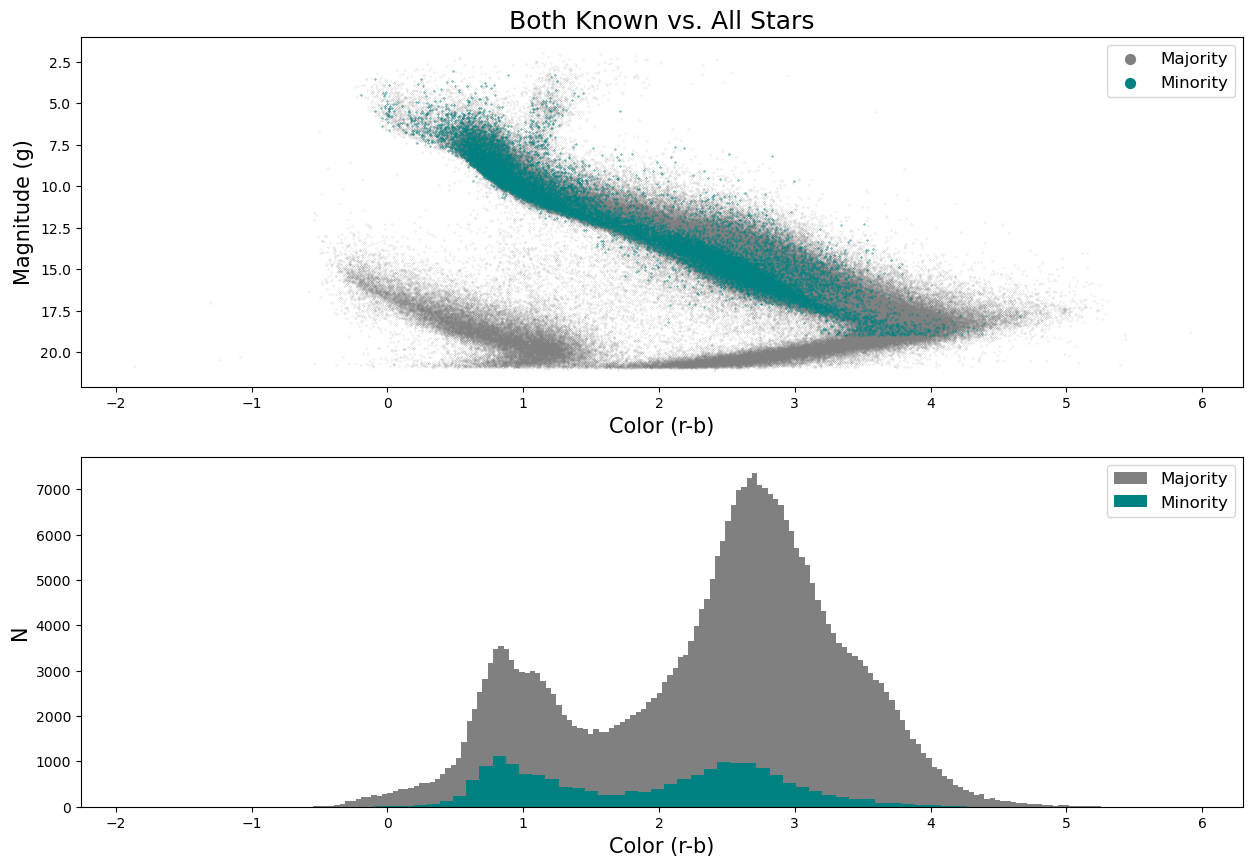

In [14]:
hr_hist(data,both,title = "Both Known vs. All Stars", num_bins_minority=50)

/var/folders/_1/kjfmx9l970x8msh8rfwt4fzr0000gn/T/ipykernel_5699/838911091.py:9: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgnd.legendHandles:


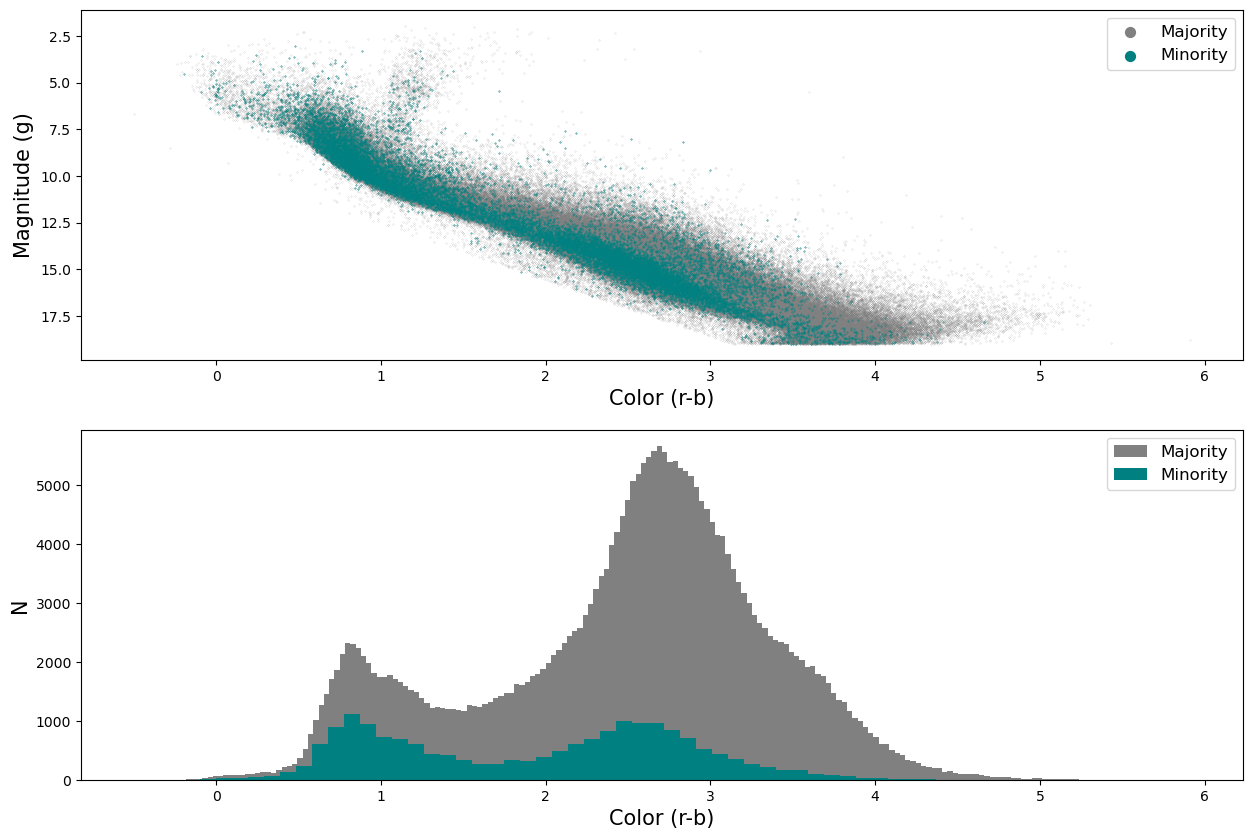

In [15]:
ms_all = get_MS(data)
ms_both = get_MS(both)
hr_hist(ms_all,ms_both)

/var/folders/_1/kjfmx9l970x8msh8rfwt4fzr0000gn/T/ipykernel_5699/2236651721.py:28: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgnd.legendHandles:


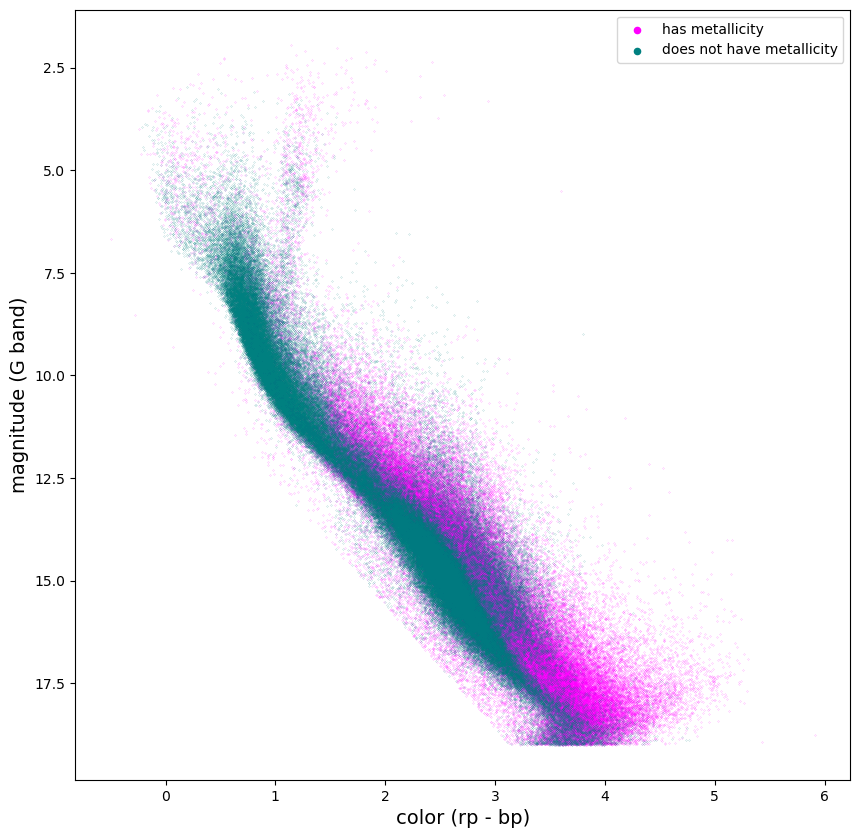

In [16]:
def main_seq_line(color):
    color = 3*color + 9.6
    return color

with_metal_color = with_metal["phot_bp_mean_mag"] - with_metal["phot_rp_mean_mag"]
without_metal_color = without_metal["phot_bp_mean_mag"] - without_metal["phot_rp_mean_mag"]

with_metal_indices = np.greater(main_seq_line(with_metal_color), with_metal["phot_g_mean_mag"])
without_metal_indices = np.greater(main_seq_line(without_metal_color), without_metal["phot_g_mean_mag"])
without_metal_indices = np.logical_and(without_metal_indices, np.less(without_metal["phot_g_mean_mag"],19))

plt.figure(figsize=(10,10))
plt.xlabel("color (rp - bp)", fontsize = 14)
plt.ylabel("magnitude (G band)",fontsize = 14)
plt.gca().invert_yaxis()

without_metal_main_color = without_metal_color[without_metal_indices]
without_metal_main_mag = without_metal["phot_g_mean_mag"][without_metal_indices]
with_metal_main_color = with_metal_color[with_metal_indices]
with_metal_main_mag = with_metal["phot_g_mean_mag"][with_metal_indices]

plt.scatter(without_metal_main_color,without_metal_main_mag,\
        color = 'magenta', label = "has metallicity", s=.01, alpha=1)
plt.scatter(with_metal_main_color,with_metal_main_mag,\
        color = 'teal', label = "does not have metallicity", s=.01, alpha=1)

lgnd = plt.legend()
for handle in lgnd.legendHandles:
    handle.set_sizes([20])
    handle.set_alpha(1)
plt.show()

In [25]:
total_ISO_mass = get_ISO_mass(both) * (data.shape[0]/both.shape[0])
print(f"The total mass of ISOs produced by stars in in the solar neighborhood is roughly {total_ISO_mass:.2e} Earth masses.")

# oumuamua_mass = 10**10 kg
# solar_mass = 2*10**30 kg
avg_ISO_mass = 2 * 10**-20 #oumuamua_mass/solar_mass
ISO_count = total_ISO_mass/avg_ISO_mass
print(f"This means there are {ISO_count:.2e} ISOs produced by stars in the solar neighborhood.")

# volume_spread_to = math.pi * (8.5*10**3 - 100)**2
# ISO_density = (ISO_count/(4/3 * math.pi * 100**3)) * (1/206265)**3
# print(f"And the ISO density is {ISO_density} per AU^3")

The total mass of ISOs produced by stars in in the solar neighborhood is roughly 7.38e+06 Earth masses.
This means there are 3.69e+26 ISOs produced by stars in the solar neighborhood.
